<a href="https://www.kaggle.com/code/mansipanchal24/automotive-ml-nn?scriptVersionId=190182002" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automotive-vehicles-engine-health-dataset/engine_data.csv


# Exploring the data

In [2]:
path = '/kaggle/input/automotive-vehicles-engine-health-dataset/engine_data.csv'
auto_df = pd.read_csv(path)
auto_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [3]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [4]:
print('Count Null Values')
print('--------------------')
print(auto_df.isnull().sum())

Count Null Values
--------------------
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


In [5]:
auto_df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [6]:
x = auto_df.drop('Engine Condition', axis = 1)
y = auto_df['Engine Condition']

In [7]:
y.value_counts(1) # showing proportion of healthy vs unhealthy engine

Engine Condition
1    0.630509
0    0.369491
Name: proportion, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

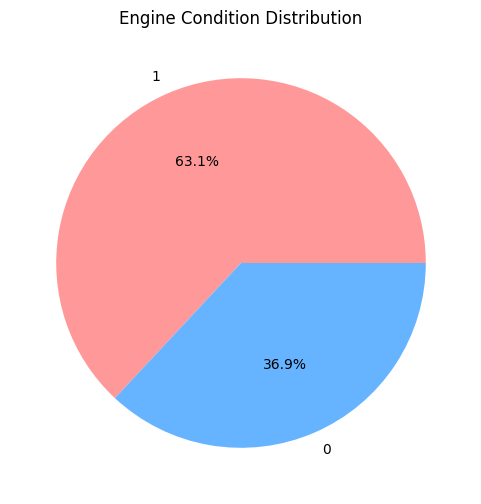

In [9]:
label_count = y.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Engine Condition Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

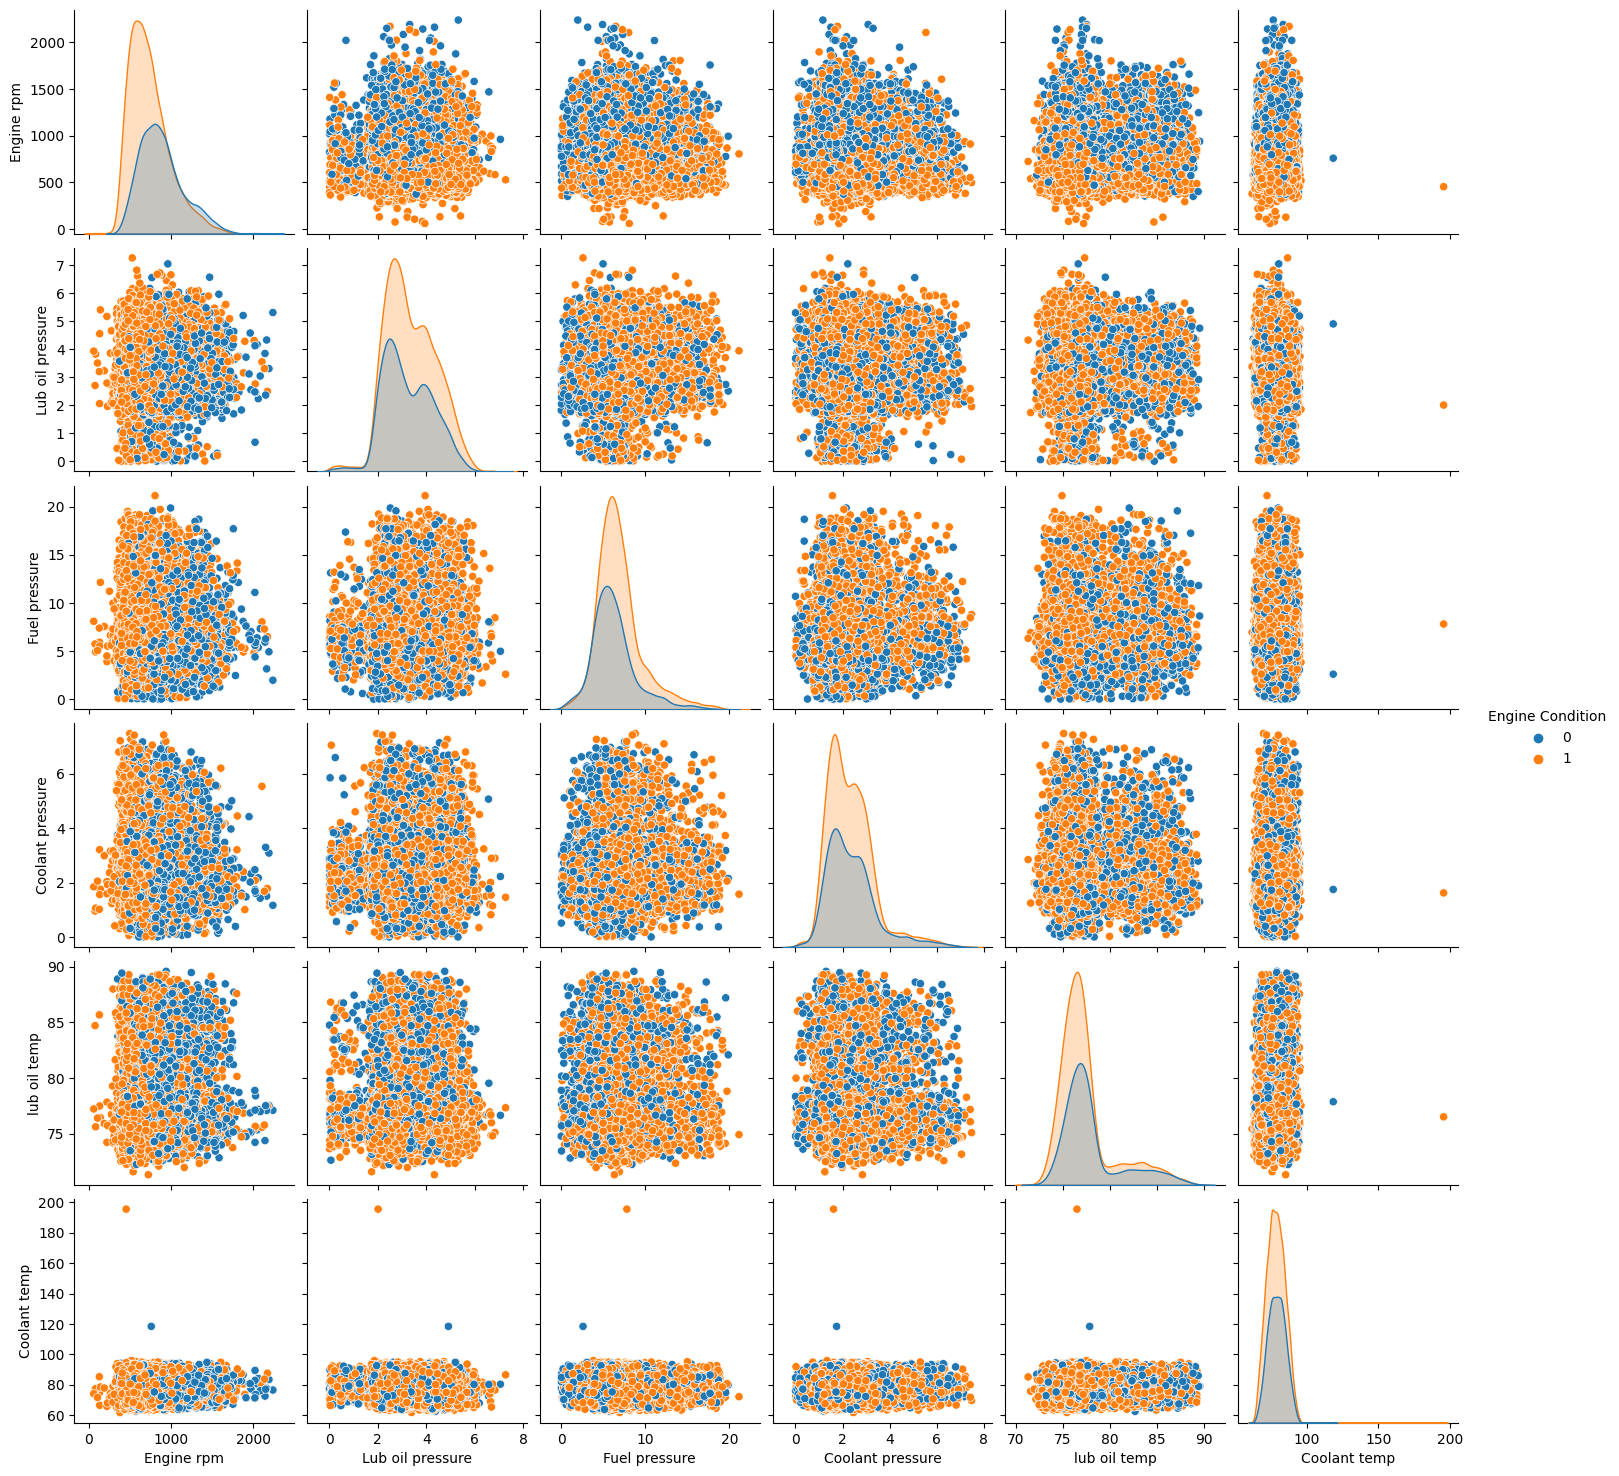

In [10]:
sns.pairplot(auto_df, hue='Engine Condition')

In [11]:
x_scaled = StandardScaler().fit_transform(x)

In [12]:
x_scaled

array([[-3.40948363e-01, -7.93040301e-01,  1.85998007e+00,
         8.14017816e-01,  2.08966341e+00,  5.16346861e-01],
       [ 3.16739019e-01, -3.54505921e-01,  3.45469863e+00,
         1.24604735e-01, -7.99080550e-04,  6.47423337e-01],
       [-1.01358319e+00, -3.34792418e-01, -3.71135083e-02,
        -1.22643440e+00,  3.49884522e-02,  1.96298382e-01],
       ...,
       [-4.00738125e-01, -6.17091118e-01, -6.25958338e-01,
        -4.16649216e-01, -2.56671467e-01,  1.27443761e+00],
       [-3.55895804e-01, -2.05176513e-01,  5.92622144e-01,
        -1.07457338e+00, -1.49065023e-01, -7.73860875e-01],
       [-1.07337295e+00,  4.61494761e-01, -9.75437814e-01,
        -2.86312619e-01, -6.68328980e-01,  3.21269538e-01]])

# ML models (KNN,Logistic Regression and Random Forest)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state = 36, test_size = 0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14651, 6), (4884, 6), (14651,), (4884,))

In [14]:
corr = auto_df.corr()
corr["Engine Condition"].sort_values(ascending=False)

Engine Condition    1.000000
Fuel pressure       0.116259
Lub oil pressure    0.060904
Coolant pressure   -0.024054
Coolant temp       -0.046326
lub oil temp       -0.093635
Engine rpm         -0.268201
Name: Engine Condition, dtype: float64

In [15]:
reg_auto = LogisticRegression().fit(x_train, y_train)

In [16]:
pred = reg_auto.predict(x_test)

<Figure size 800x600 with 0 Axes>

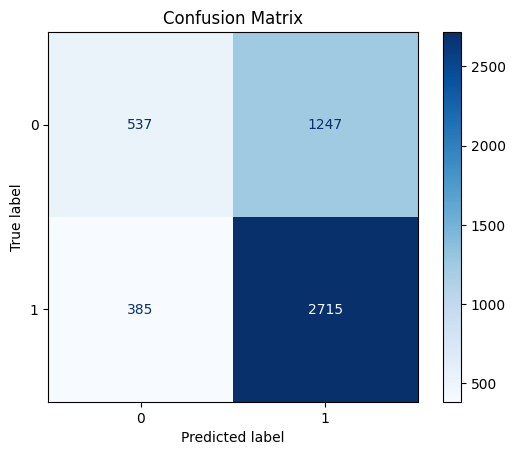

In [17]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [18]:
lr_class = classification_report(y_test, pred)
print(lr_class)

              precision    recall  f1-score   support

           0       0.58      0.30      0.40      1784
           1       0.69      0.88      0.77      3100

    accuracy                           0.67      4884
   macro avg       0.63      0.59      0.58      4884
weighted avg       0.65      0.67      0.63      4884



Accuracy: 0.66
Confusion Matrix:
[[ 607 1177]
 [ 507 2593]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.34      0.42      1784
           1       0.69      0.84      0.75      3100

    accuracy                           0.66      4884
   macro avg       0.62      0.59      0.59      4884
weighted avg       0.64      0.66      0.63      4884



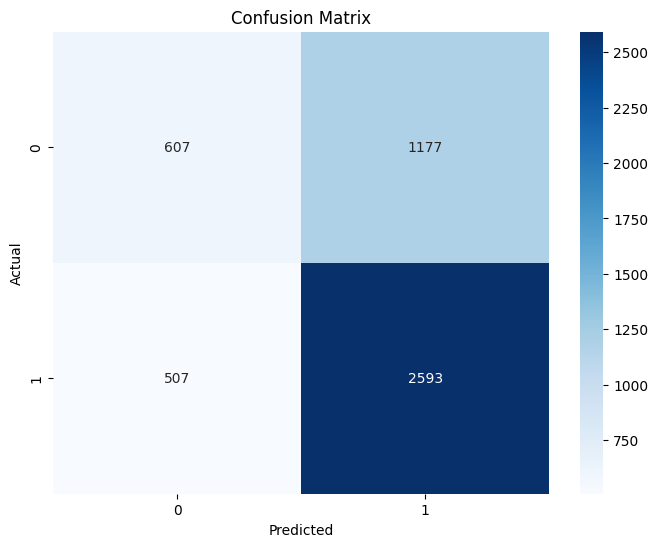

In [19]:
knn = KNeighborsClassifier(n_neighbors=50) 

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy_knn:.2f}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('Classification Report:')
print(class_report_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

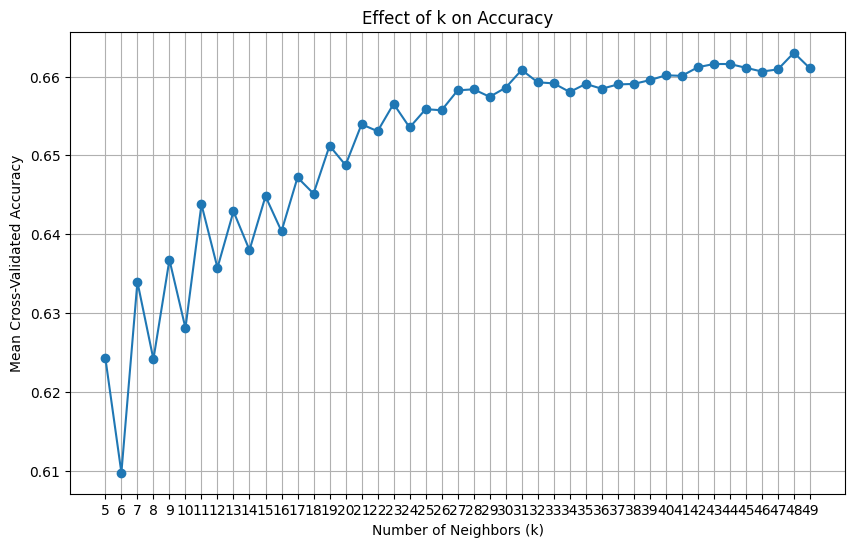

In [20]:
from sklearn.model_selection import cross_val_score
k_values = range(5,50)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')  
    mean_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Effect of k on Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

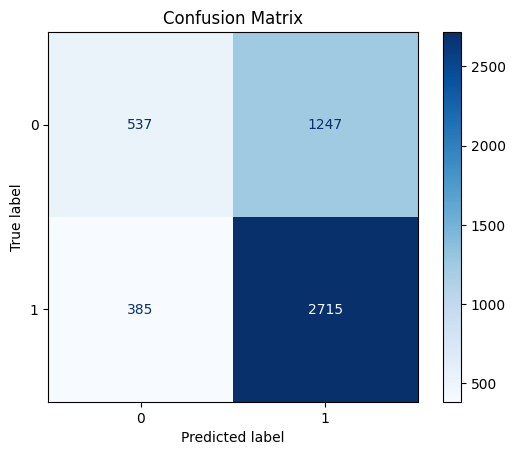

              precision    recall  f1-score   support

           0       0.54      0.41      0.47      1784
           1       0.70      0.79      0.74      3100

    accuracy                           0.65      4884
   macro avg       0.62      0.60      0.61      4884
weighted avg       0.64      0.65      0.64      4884



In [21]:
rand_auto = RandomForestClassifier().fit(x_train, y_train)
pred_rf = rand_auto.predict(x_test)
cm_rf = confusion_matrix(y_test, pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

plt.figure(figsize=(8, 6))
disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
class_report_rf = classification_report(y_test, pred_rf)
print(class_report_rf)

# Neural Network model using torch

In [22]:
import torch
from torch import nn
from torch import optim

In [23]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(in_features=6, out_features=120) 
        self.fc2 = nn.Linear(in_features=120, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=120)  
        self.fc4 = nn.Linear(in_features=120, out_features=1)
        self.ac = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.ac(self.fc4(x))
        return x

model = ANNModel()
criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [24]:
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/500], Loss: 0.5888
Epoch [200/500], Loss: 0.5668
Epoch [300/500], Loss: 0.5421
Epoch [400/500], Loss: 0.5193
Epoch [500/500], Loss: 0.4987


Accuracy: 0.64
Confusion Matrix:
[[ 682 1102]
 [ 676 2424]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.38      0.43      1784
         1.0       0.69      0.78      0.73      3100

    accuracy                           0.64      4884
   macro avg       0.59      0.58      0.58      4884
weighted avg       0.62      0.64      0.62      4884



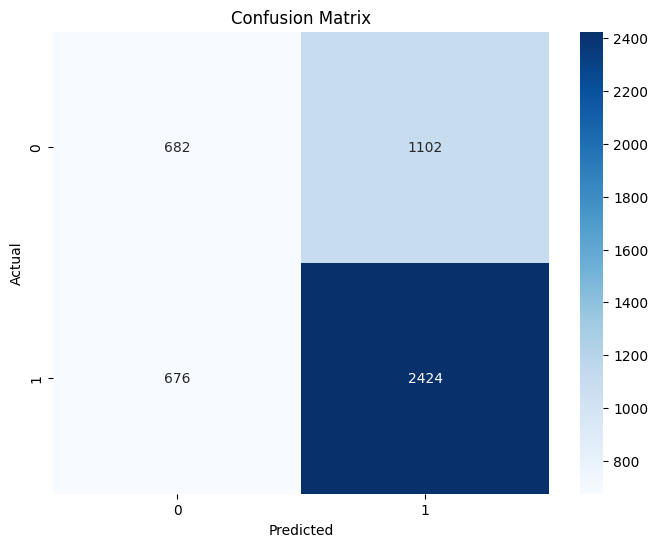

In [25]:
model.eval()
with torch.no_grad():
    y_pred_prob = model(x_test_tensor).squeeze()
    y_pred = (y_pred_prob >= 0.5).float()  # Convert probabilities to binary class labels


y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()

accuracy = accuracy_score(y_test_np, y_pred_np)
conf_matrix = confusion_matrix(y_test_np, y_pred_np)
class_report_nn = classification_report(y_test_np, y_pred_np)


print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report_nn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
y_train.value_counts(1)

Engine Condition
1    0.629104
0    0.370896
Name: proportion, dtype: float64

In [27]:
y_test.value_counts(1)

Engine Condition
1    0.634726
0    0.365274
Name: proportion, dtype: float64